<img src="https://i.postimg.cc/ydZcb9cY/Hello.jpg">

<img src="https://i.postimg.cc/cJtP9rZY/Water-Potability-12-16-2023.png">

<p style="text-align:center"><img src="https://i.postimg.cc/jqnmRWJF/Hydration-Beyond-H-2-O.jpg">

<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/nVvLN8XJ/1567862.jpg);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c"> Table Of Content</p></b></h1>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/nVvLN8XJ/1567862.jpg)">

<h2><span style="text-align:center; font-weight:bolder; color:navy; font-size:130%">Table of Contents:</span></h2>

 * **[Step 1 | Python Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Collecting Data](#load_data)
    -  [2.2 | Data Information](#info)
    -  [2.3 | Attribute Information](#columns)
 *  **[Step 3 | Data Preprocessning](#preprocessing)**
    -  [3.1 | Missing Values Handling](#missing)
    -  [3.2 | Visualization and Plots](#plot)
    -  [3.3 | Plots Analysis](#plot_analysis)
    -  [3.4 | Target Categorizing](#Target_Categorizing)
    -  [3.5 | Normalization](#norm)
 *  **[Step 4 | Modeling](#ml)**
    -  [4.1 | Initialization](#init)
    -  [4.2 | RandomForestClassifier](#rf)
    -  [4.3 | LogisticRegression](#lr)
    -  [4.4 | SVC](#svc)
    -  [4.5 | DecisionTreeClassifier](#tree)
    -  [4.6 | KNeighborsClassifier](#knn)
    -  [4.7 | GaussianNB](#gnb)
    -  [4.8 | result](#result)
    -  [4.9 | Final Modeling](#final_ml)
 *  **[Author](#author)**

<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/nVvLN8XJ/1567862.jpg);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step1 | Python Libraries</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="import"></a>
<h2><b><span style="color:navy">💧 Step 1.1 | </span><span style="color:blue">Import Libraries</span></b></h2>

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings

from sklearn.preprocessing import MinMaxScaler

print(colored('\nAll libraries imported succesfully', 'green'))


All libraries imported succesfully


<a id="config"></a>
<h2><b><span style="color:navy">💧 Step 1.2 | </span><span style="color:blue">Library configurations</span></b></h2>

In [8]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [ ]:
# sns.color_palette("cool_r", n_colors=1)

In [9]:
print(colored('\nAll libraries Configed succesfully.', 'green'))


All libraries Configed succesfully.


<a id="data"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/nVvLN8XJ/1567862.jpg);font-family:tahoma;font-size:120%;color:navy;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step2 | Data</p></b></h1>

[🏠 Tabel of Contents](#content)

<a id="load_data"></a>
<h2><b><span style="color:navy">💧 Step 2.1 | </span><span style="color:blue">Collecting Data</span></b></h2>

In [12]:
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [37]:
data.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


# Plots

In [42]:
columns_name = data.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


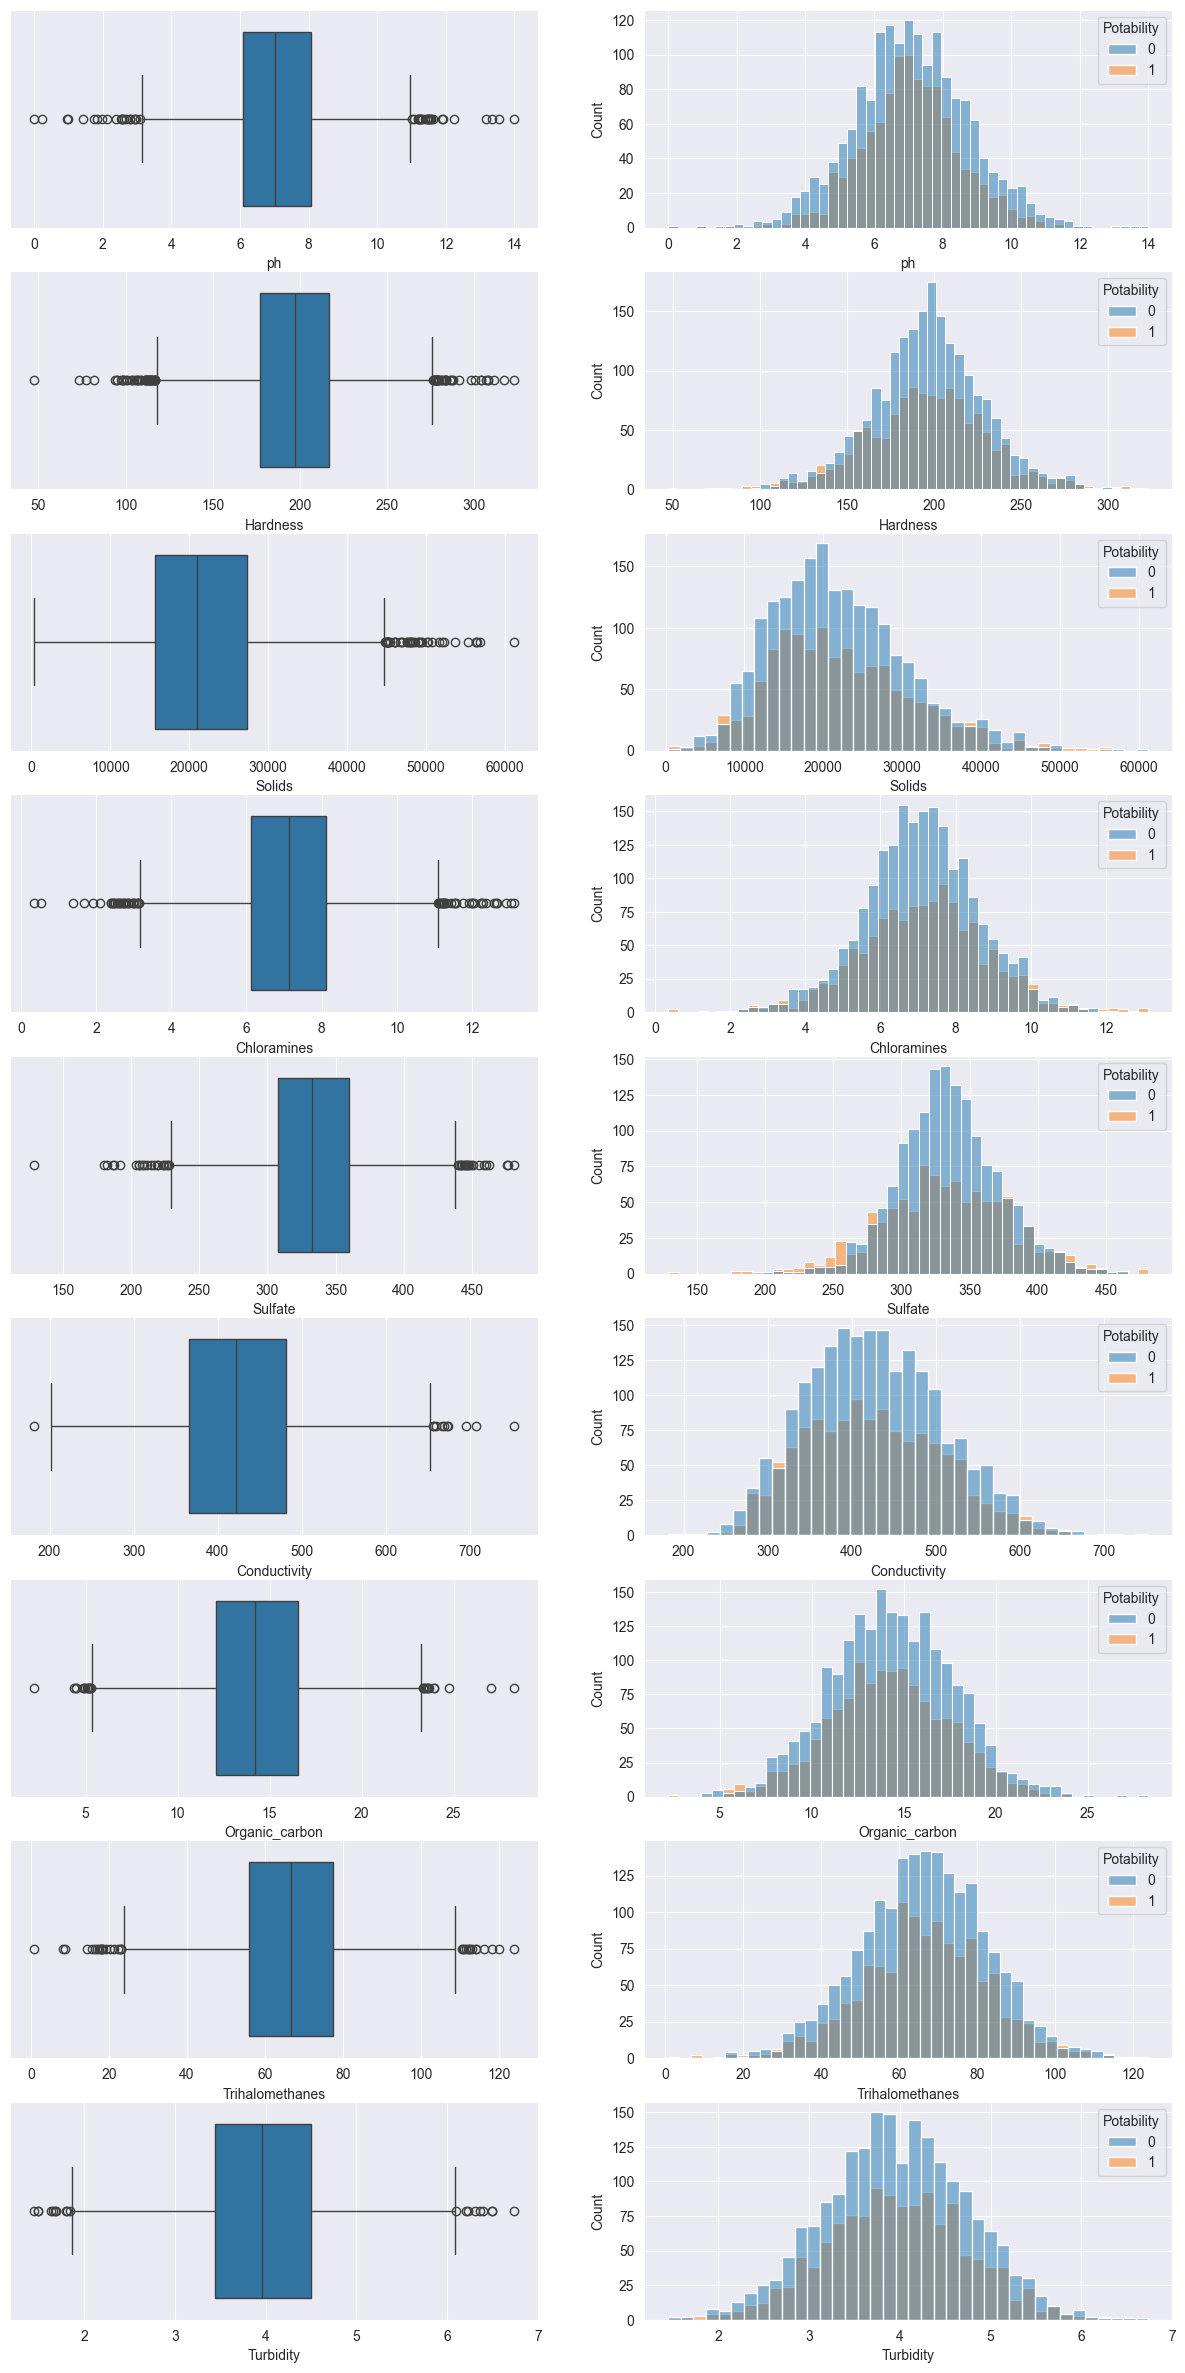

In [50]:
fig, ax = plt.subplots(9, 2, figsize=(15, 30))
for i in range(9) :
    # Left Ax
    sns.boxplot(x=columns_name[i], data=data, ax=ax[i, 0])
    # Right Ax
    sns.histplot(x=columns_name[i], data=data, ax=ax[i, 1], hue='Potability')

Potability
0    1998
1    1278
Name: count, dtype: int64


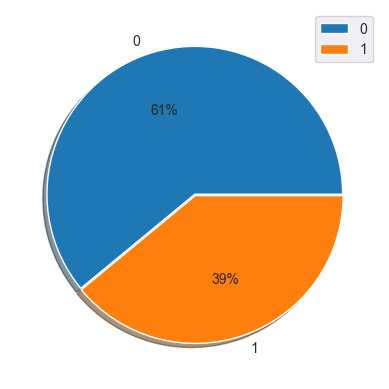

In [99]:
tar = data['Potability'].value_counts()
print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

# Missing values

In [14]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [17]:
print("Number of samples : ", len(data))

Number of samples :  3276


In [25]:
print('Percentage(%) of nulls for each columns : \n')
print((data.isna().sum()/len(data))*100)

Percentage(%) of nulls for each columns : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


### Because of larg number of missing values, we fill them with median for each category
### columns with missing values :
 - ph
 - Sulfate
 - Trihalomethanes

In [111]:
# For Potability==1
data[data.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [114]:
# For Potability==1
data[data.Potability==0][['ph', 'Sulfate', 'Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [ ]:
# Values are aproximately same.

In [112]:
# Replace missing values with medians above

In [122]:
data['ph'] = data['ph'].fillna(value=data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(value=data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median())

In [123]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [124]:
# All of the missing values handled. 👍

# Normalization

In [126]:
# Define X, y
X = data.drop(columns='Potability')
y = data.Potability

In [128]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.505300,0.540231,0.356173,0.529963,0.581223,0.427940,0.463026,0.532763,0.475853
std,0.105003,0.119263,0.143968,0.123921,0.102672,0.141336,0.126750,0.127939,0.147548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.448405,0.469432,0.251957,0.452088,0.534313,0.322196,0.378000,0.453584,0.376198
50%,0.502625,0.542401,0.338338,0.530591,0.579704,0.420386,0.460473,0.534508,0.473630
75%,0.562146,0.613857,0.443498,0.607662,0.628882,0.525145,0.550102,0.615994,0.576729
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
